# Claude Sonnet 3.5 V2 with v2.26 v2 prompt

This notebook outlines the steps undertook to generate a prediction using Claude Sonnet 3.5 V2 with prompt from 2/26/25 v2.

This prompt is built from combining the v2.17 and the v2.26 version to apply stricter rules and instructions on overrule vs not overrule.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from new_pred_utils import predict
from evaluate_predictions import show_metrics

from instructions import claude_instructions_v226_v2
MODEL_ID = "anthropic.claude-3-5-sonnet-20241022-v2:0"
SYSTEM_PROMPT = claude_instructions_v226_v2

# Load the data

In [2]:
df = pd.read_csv("data/dataset_output.csv")
len(df)

1099

In [3]:
df.head()

,citing_opinion_id,court,docket_id,cluster_id,cited_opinion_id,overruled,opinion_types,opinion_sources,citing_name_short,citing_name,citing_name_full,cited_ref_names,cited_cluster_id,cited_name_short,cited_name,cited_name_full,cited_citations,filename
0,91306,scotus,2297559,91306,88061,yes,['010combined'],['html_with_citations'],Morgan,Morgan v. United States,MORGAN & Another v. UNITED STATES; UNITED STAT...,"['White', '7 Wall. 700']",88061,White,Texas v. White,Texas v. White Et Al.,"['74 U.S. 700', '19 L. Ed. 227', '7 Wall. 700'...",0001.91306_cites_88061.txt
1,91306,scotus,2297559,91306,88994,no,['010combined'],['html_with_citations'],Morgan,Morgan v. United States,MORGAN & Another v. UNITED STATES; UNITED STAT...,"['21 Wall. 138', '21 Wall. 138, 142']",88994,NaN,Vermilye & Co. v. Adams Express Co.,Vermilye & Co. v. Adams Express Company,"['88 U.S. 138', '22 L. Ed. 609', '21 Wall. 138...",0002.91306_cites_88994.txt
2,91306,scotus,2297559,91306,87633,no,['010combined'],['html_with_citations'],Morgan,Morgan v. United States,MORGAN & Another v. UNITED STATES; UNITED STAT...,['2 Wall. 110'],87633,Murray,Murray v. Lardner,Murray v. Lardner,"['69 U.S. 110', '17 L. Ed. 857', '2 Wall. 110'...",0003.91306_cites_87633.txt
3,91306,scotus,2297559,91306,88240,no,['010combined'],['html_with_citations'],Morgan,Morgan v. United States,MORGAN & Another v. UNITED STATES; UNITED STAT...,"['10 Wall. 68', 'Hardenberg']",88240,Hardenberg,Texas v. Hardenberg,Texas v. Hardenberg,"['77 U.S. 68', '19 L. Ed. 839', '10 Wall. 68',...",0004.91306_cites_88240.txt
4,91306,scotus,2297559,91306,88693,no,['010combined'],['html_with_citations'],Morgan,Morgan v. United States,MORGAN & Another v. UNITED STATES; UNITED STAT...,['16 Wall. 402'],88693,Huntington,Huntington v. Texas,Huntington v. Texas; Texas v. Huntington,"['83 U.S. 402', '21 L. Ed. 316', '16 Wall. 402...",0005.91306_cites_88693.txt


# Use the model to generation predictions

In [4]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:root:Completed: 4
INFO:root:Completed: 0
INFO:root:Completed: 1
INFO:root:Completed: 2
INFO:root:Completed: 3
INFO:root:Completed: 5
INFO:root:Completed: 7
INFO:root:Completed: 6
INFO:root:Completed: 9
INFO:root:Completed: 8
INFO:root:Completed: 10
INFO:root:Completed: 12
INFO:root:Completed: 13
INFO:root:Completed: 11
INFO:root:Completed: 15
INFO:root:Completed: 16
INFO:root:Completed: 14
INFO:root:Completed: 17
INFO:root:Completed: 18
INFO:root:Completed: 19
INFO:root:Completed: 21
INFO:root:Completed: 23
INFO:root:Completed: 20
INFO:root:Completed: 22
INFO:root:Completed: 25
INFO:root:Completed: 24
INFO:root:Completed: 26
INFO:root:Completed: 27
INFO:root:Completed: 28
INFO:root:Completed: 29


CPU times: user 1min 10s, sys: 5.08 s, total: 1min 15s
Wall time: 30min 4s


[{'0005.91306_cites_88693.txt': {'model': 'anthropic.claude-3-5-sonnet-20241022-v2:0',
   'input_tokens': 3853,
   'output_tokens': 200,
   'prediction': 'no',
   'quotes': None,
   'rationale': 'The passage merely discusses and cites Huntington v. Texas as part of a series of related cases dealing with Texas bonds. The Acting Decision references the Cited Decision to explain previous holdings but does not take any explicit or implicit negative actions to overrule it.',
   'instructions': 'Determine whether the Acting Decision overruled the Cited Decision.',
   'target_case': 'Huntington v. Texas',
   'raw_results': '```json\n{\n  "instructions": "Determine whether the Acting Decision overruled the Cited Decision.",\n  "target_case": "Huntington v. Texas",\n  "overruled": "no",\n  "rationale": "The passage merely discusses and cites Huntington v. Texas as part of a series of related cases dealing with Texas bonds. The Acting Decision references the Cited Decision to explain previous ho

In [5]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions 
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,quotes,rationale,instructions,target_case,raw_results
0,0005.91306_cites_88693.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,3853,200,no,None,The passage merely discusses and cites Hunting...,Determine whether the Acting Decision overrule...,Huntington v. Texas,"```json\n{\n ""instructions"": ""Determine wheth..."
1,0001.91306_cites_88061.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,6480,184,yes,None,The Acting Decision explicitly overruled key a...,Determine whether the Acting Decision overrule...,Texas v. White,"```json\n{\n ""instructions"": ""Determine wheth..."
2,0002.91306_cites_88994.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,5735,199,no,None,The Acting Decision discusses and questions so...,Determine whether the Acting Decision overrule...,Vermilye & Co. v. Adams Express Co.,"```json\n{\n ""instructions"": ""Determine wheth..."
3,0003.91306_cites_87633.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,4580,220,no,None,The Acting Decision does not overrule Murray v...,Determine whether the Acting Decision overrule...,Murray v. Lardner,"```json\n{\n ""instructions"": ""Determine wheth..."
4,0004.91306_cites_88240.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,5125,179,no,None,The passage discusses and references Texas v. ...,Determine whether the Acting Decision overrule...,Texas v. Hardenberg,"```json\n{\n ""instructions"": ""Determine wheth..."


## Save the raw prediction results

In [15]:
import json

def clean_and_extract_quote(raw_str):
    try:
        # Remove wrapping markdown code block
        cleaned = raw_str.strip().removeprefix('```json').removesuffix('```')
        # Unescape \n and other sequences
        cleaned = cleaned.encode('utf-8').decode('unicode_escape')
        # Load JSON
        parsed = json.loads(cleaned)
        return parsed.get('quote')
    except Exception as e:
        return f'Error: {e}'

In [16]:
prediction_df['quotes'] = prediction_df['raw_results'].apply(clean_and_extract_quote)
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,quotes,rationale,instructions,target_case,raw_results
0,0005.91306_cites_88693.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,3853,200,no,The court rehearsed the propositions decided i...,The passage merely discusses and cites Hunting...,Determine whether the Acting Decision overrule...,Huntington v. Texas,"```json\n{\n ""instructions"": ""Determine wheth..."
1,0001.91306_cites_88061.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,6480,184,yes,The position there taken that the legislature ...,The Acting Decision explicitly overruled key a...,Determine whether the Acting Decision overrule...,Texas v. White,"```json\n{\n ""instructions"": ""Determine wheth..."
2,0002.91306_cites_88994.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,5735,199,no,We have not quoted the language from the opini...,The Acting Decision discusses and questions so...,Determine whether the Acting Decision overrule...,Vermilye & Co. v. Adams Express Co.,"```json\n{\n ""instructions"": ""Determine wheth..."
3,0003.91306_cites_87633.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,4580,220,no,"The rules established in Murray v. Lardner, 2 ...",The Acting Decision does not overrule Murray v...,Determine whether the Acting Decision overrule...,Murray v. Lardner,"```json\n{\n ""instructions"": ""Determine wheth..."
4,0004.91306_cites_88240.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,5125,179,no,The case came before the court again in anothe...,The passage discusses and references Texas v. ...,Determine whether the Acting Decision overrule...,Texas v. Hardenberg,"```json\n{\n ""instructions"": ""Determine wheth..."


In [17]:
prediction_df.to_csv("predictions/1.sonnet3.5v2_v226_v2_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [18]:
prediction_df["prediction"].isna().sum()

np.int64(1)

In [19]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
prediction_df = pd.read_csv("predictions/1.sonnet3.5v2_v226_v2_prompt.csv")

In [20]:
prediction_df["prediction"].isna().sum()

np.int64(0)

# Combine the prediction results with label for evaluation

In [21]:
assert len(df) == len(prediction_df)

In [22]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,citing_opinion_id,court,docket_id,cluster_id,cited_opinion_id,overruled,opinion_types,opinion_sources,citing_name_short,citing_name,...,filename,model,input_tokens,output_tokens,prediction,quotes,rationale,instructions,target_case,raw_results
0,91306,scotus,2297559,91306,88061,yes,['010combined'],['html_with_citations'],Morgan,Morgan v. United States,...,0001.91306_cites_88061.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,6480,184,yes,The position there taken that the legislature ...,The Acting Decision explicitly overruled key a...,Determine whether the Acting Decision overrule...,Texas v. White,"```json\n{\n ""instructions"": ""Determine wheth..."
1,91306,scotus,2297559,91306,88994,no,['010combined'],['html_with_citations'],Morgan,Morgan v. United States,...,0002.91306_cites_88994.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,5735,199,no,We have not quoted the language from the opini...,The Acting Decision discusses and questions so...,Determine whether the Acting Decision overrule...,Vermilye & Co. v. Adams Express Co.,"```json\n{\n ""instructions"": ""Determine wheth..."
2,91306,scotus,2297559,91306,87633,no,['010combined'],['html_with_citations'],Morgan,Morgan v. United States,...,0003.91306_cites_87633.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,4580,220,no,"The rules established in Murray v. Lardner, 2 ...",The Acting Decision does not overrule Murray v...,Determine whether the Acting Decision overrule...,Murray v. Lardner,"```json\n{\n ""instructions"": ""Determine wheth..."
3,91306,scotus,2297559,91306,88240,no,['010combined'],['html_with_citations'],Morgan,Morgan v. United States,...,0004.91306_cites_88240.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,5125,179,no,The case came before the court again in anothe...,The passage discusses and references Texas v. ...,Determine whether the Acting Decision overrule...,Texas v. Hardenberg,"```json\n{\n ""instructions"": ""Determine wheth..."
4,91306,scotus,2297559,91306,88693,no,['010combined'],['html_with_citations'],Morgan,Morgan v. United States,...,0005.91306_cites_88693.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,3853,200,no,The court rehearsed the propositions decided i...,The passage merely discusses and cites Hunting...,Determine whether the Acting Decision overrule...,Huntington v. Texas,"```json\n{\n ""instructions"": ""Determine wheth..."


# Run evaluation

In [23]:
df["overruled"].value_counts()

overruled
no     938
yes    161
Name: count, dtype: int64

In [24]:
eval_df["overruled"].value_counts()

overruled
no     938
yes    161
Name: count, dtype: int64

In [25]:
eval_df["prediction"].value_counts()

prediction
no     907
yes    192
Name: count, dtype: int64

In [26]:
eval_df["input_tokens"].sum()

np.int64(11211639)

In [27]:
eval_df["output_tokens"].sum()

np.int64(236660)

In [28]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0})

In [29]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.98      0.95      0.96       938
         Yes       0.74      0.89      0.81       161

    accuracy                           0.94      1099
   macro avg       0.86      0.92      0.89      1099
weighted avg       0.95      0.94      0.94      1099



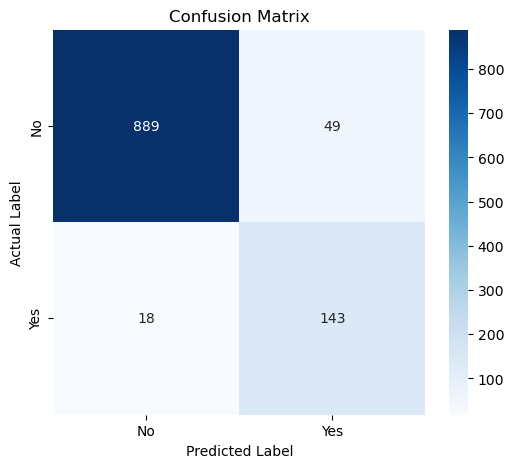

In [30]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [31]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.94
Precision: 0.74
Recall: 0.89
F-score: 0.81
Specificity: 0.95
---------
DATASET
Total Responses: 1099
Total Positives: 161
Total Negatives: 938
---------
RECOUNT
True positives: 143
True negatives: 889
False positives: 49
False negatives: 18


# Save the evaluation df

In [32]:
eval_df.head()

,citing_opinion_id,court,docket_id,cluster_id,cited_opinion_id,overruled,opinion_types,opinion_sources,citing_name_short,citing_name,...,filename,model,input_tokens,output_tokens,prediction,quotes,rationale,instructions,target_case,raw_results
0,91306,scotus,2297559,91306,88061,yes,['010combined'],['html_with_citations'],Morgan,Morgan v. United States,...,0001.91306_cites_88061.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,6480,184,yes,The position there taken that the legislature ...,The Acting Decision explicitly overruled key a...,Determine whether the Acting Decision overrule...,Texas v. White,"```json\n{\n ""instructions"": ""Determine wheth..."
1,91306,scotus,2297559,91306,88994,no,['010combined'],['html_with_citations'],Morgan,Morgan v. United States,...,0002.91306_cites_88994.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,5735,199,no,We have not quoted the language from the opini...,The Acting Decision discusses and questions so...,Determine whether the Acting Decision overrule...,Vermilye & Co. v. Adams Express Co.,"```json\n{\n ""instructions"": ""Determine wheth..."
2,91306,scotus,2297559,91306,87633,no,['010combined'],['html_with_citations'],Morgan,Morgan v. United States,...,0003.91306_cites_87633.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,4580,220,no,"The rules established in Murray v. Lardner, 2 ...",The Acting Decision does not overrule Murray v...,Determine whether the Acting Decision overrule...,Murray v. Lardner,"```json\n{\n ""instructions"": ""Determine wheth..."
3,91306,scotus,2297559,91306,88240,no,['010combined'],['html_with_citations'],Morgan,Morgan v. United States,...,0004.91306_cites_88240.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,5125,179,no,The case came before the court again in anothe...,The passage discusses and references Texas v. ...,Determine whether the Acting Decision overrule...,Texas v. Hardenberg,"```json\n{\n ""instructions"": ""Determine wheth..."
4,91306,scotus,2297559,91306,88693,no,['010combined'],['html_with_citations'],Morgan,Morgan v. United States,...,0005.91306_cites_88693.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,3853,200,no,The court rehearsed the propositions decided i...,The passage merely discusses and cites Hunting...,Determine whether the Acting Decision overrule...,Huntington v. Texas,"```json\n{\n ""instructions"": ""Determine wheth..."


In [33]:
eval_df.to_csv("predictions/1.sonnet3.5v2_v226_v2_prompt_eval.csv", index=False)